## Import Libraries and Data Sets

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [65]:
# Import hospital_general_information dataset
path =  r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\U.S. Hospitals'
hospital_general_information = pd.read_csv(os.path.join(path, 'Data','Prepared Data', 'Hospital_General_Information_Clean.csv'), index_col = False)

## Data Cleaning 

In [67]:
# Create a subset to prepare data for cluster analysis
hospital_general_information_subset = hospital_general_information[['hospital_overall_rating', 'emergency_services', 'hospital_type', 'mortality_national_comparison', 'safety_of_care_national_comparison', 'readmission_national_comparison', 'patient_experience_national_comparison', 'effectiveness_of_care_national_comparison', 'timeliness_of_care_national_comparison']]

In [68]:
hospital_general_information_subset

,hospital_overall_rating,emergency_services,hospital_type,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison
0,3.0,True,Acute Care Hospitals,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average
1,4.0,True,Acute Care Hospitals,Same as the National average,Not Available,Same as the National average,Not Available,Same as the National average,Same as the National average
2,3.0,True,Acute Care Hospitals,Below the National average,Above the National average,Same as the National average,Same as the National average,Same as the National average,Same as the National average
3,3.0,True,Acute Care Hospitals,Same as the National average,Below the National average,Above the National average,Below the National average,Below the National average,Below the National average
4,3.0,True,Acute Care Hospitals,Same as the National average,Not Available,Same as the National average,Below the National average,Below the National average,Not Available
...,...,...,...,...,...,...,...,...,...
4813,3.0,True,Critical Access Hospitals,Same as the National average,Not Available,Same as the National average,Above the National average,Same as the National average,Same as the National average
4814,4.0,True,Acute Care Hospitals,Not Available,Above the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average
4815,NaN,True,Critical Access Hospitals,Not Available,Not Available,Same as the National average,Not Available,Not Available,Not Available
4816,NaN,True,Acute Care Hospitals,Not Available,Not Available,Not Available,Not Available,Not Available,Same as the National average


In [69]:
# Check for missing values 
hospital_general_information_subset.isnull().sum()

hospital_overall_rating                      1170
emergency_services                              0
hospital_type                                   0
mortality_national_comparison                   0
safety_of_care_national_comparison              0
readmission_national_comparison                 0
patient_experience_national_comparison          0
effectiveness_of_care_national_comparison       0
timeliness_of_care_national_comparison          0
dtype: int64

In [70]:
# Address missing values with 0 
hospital_general_information_subset['hospital_overall_rating'].fillna(0, inplace=True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2634420993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['hospital_overall_rating'].fillna(0, inplace=True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2634420993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_general_information_subse

In [71]:
# To prepare for cluster analysis, convert categorical observations to numeric values 
hospital_general_information_subset['hospital_type'].replace('Acute Care Hospitals', '1', inplace = True)
hospital_general_information_subset['hospital_type'].replace('Critical Access Hospitals', '2', inplace = True)
hospital_general_information_subset['hospital_type'].replace('Childrens', '3', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\3291976030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['hospital_type'].replace('Acute Care Hospitals', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\3291976030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_genera

In [72]:
# In mortality_national_comparison, replace with numerical value
hospital_general_information_subset['mortality_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['mortality_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['mortality_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['mortality_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\1117832501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['mortality_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\1117832501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [73]:
# In safety_of_care_national_comparison column replace with numerical values for analysis purposes
hospital_general_information_subset['safety_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['safety_of_care_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['safety_of_care_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['safety_of_care_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2554086295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['safety_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2554086295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [74]:
# In readmission_national_comparison column, replace with numerical values 
hospital_general_information_subset['readmission_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['readmission_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['readmission_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['readmission_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\550068671.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['readmission_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\550068671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [75]:
# In patient_experience_national_comparison column, replace variables to numerical values 
hospital_general_information_subset['patient_experience_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['patient_experience_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['patient_experience_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['patient_experience_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2496311410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['patient_experience_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2496311410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [76]:
# In effectiveness_of_care_national_comparison column, replace variables with numeric value
hospital_general_information_subset['effectiveness_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['effectiveness_of_care_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['effectiveness_of_care_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['effectiveness_of_care_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2013171502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['effectiveness_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2013171502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [77]:
# In timeliness_of_care_national_comparison column, replace variables with numeric values 
hospital_general_information_subset['timeliness_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information_subset['timeliness_of_care_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information_subset['timeliness_of_care_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information_subset['timeliness_of_care_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\136213141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_subset['timeliness_of_care_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\136213141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [78]:
# Check results
hospital_general_information_subset.head()

,hospital_overall_rating,emergency_services,hospital_type,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison
0,3.0,True,1,3,2,1,2,2,1
1,4.0,True,1,2,4,2,4,2,2
2,3.0,True,1,3,1,2,2,2,2
3,3.0,True,1,2,3,1,3,3,3
4,3.0,True,1,2,4,2,3,3,4


In [79]:
# Change data types
hospital_general_information_subset['readmission_national_comparison']=hospital_general_information_subset.readmission_national_comparison.astype('int64')
hospital_general_information_subset['hospital_type']=hospital_general_information_subset.hospital_type.astype('int64')
hospital_general_information_subset['mortality_national_comparison']=hospital_general_information_subset.mortality_national_comparison.astype('int64')
hospital_general_information_subset['safety_of_care_national_comparison']=hospital_general_information_subset.safety_of_care_national_comparison.astype('int64')
hospital_general_information_subset['patient_experience_national_comparison']=hospital_general_information_subset.patient_experience_national_comparison.astype('int64')
hospital_general_information_subset['effectiveness_of_care_national_comparison']=hospital_general_information_subset.effectiveness_of_care_national_comparison.astype('int64')
hospital_general_information_subset['timeliness_of_care_national_comparison']=hospital_general_information_subset.timeliness_of_care_national_comparison.astype('int64')

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2468024209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_general_information_subset['readmission_national_comparison']=hospital_general_information_subset.readmission_national_comparison.astype('int64')
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\2468024209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_general_information_subset['hospital_type']=hospital_general_information_subset.hospital_type.astype('int64')
C:\Users\jmiel

## Elbow Technique

In [81]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [82]:
score = [kmeans[i].fit(hospital_general_information_subset).score(hospital_general_information_subset) for i in range(len(kmeans))]

C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\clust

In [101]:
score

[-45906.85325861351,
 -23926.03812481287,
 -20242.001732290453,
 -17814.400993375675,
 -16527.312555550696,
 -15392.434811504852,
 -14384.512299191814,
 -13347.461936764981,
 -12484.877388468278]

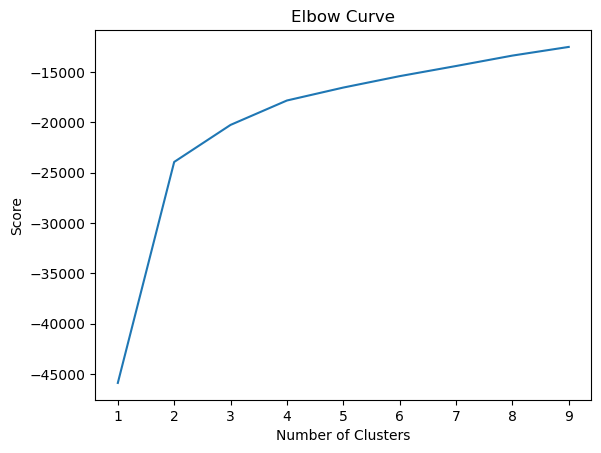

In [103]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Based on the elbow curve, it flattens out at 4 so therefore in the K-means analysis, I will pick 4 clusters

In [134]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4) 

In [136]:
# Fit the k-means object to the data.
kmeans.fit(hospital_general_information_subset)

C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [138]:
# Add cluster column
hospital_general_information_subset['clusters'] = kmeans.fit_predict(hospital_general_information_subset)

C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\1231329084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_general_information_subset['clusters'] = kmeans.fit_predict(hospital_general_information_subset)


In [146]:
hospital_general_information_subset.head(30)

,hospital_overall_rating,emergency_services,hospital_type,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,clusters
0,3.0,True,1,3,2,1,2,2,1,0
1,4.0,True,1,2,4,2,4,2,2,1
2,3.0,True,1,3,1,2,2,2,2,0
3,3.0,True,1,2,3,1,3,3,3,1
4,3.0,True,1,2,4,2,3,3,4,1
5,0.0,True,2,4,4,4,4,4,4,3
6,0.0,True,2,4,4,4,4,4,4,3
7,0.0,True,1,4,4,2,4,3,4,3
8,3.0,False,1,4,2,2,3,2,4,2
9,0.0,False,1,4,4,4,4,4,4,3


In [142]:
hospital_general_information_subset['clusters'].value_counts()

clusters
0    1537
2    1282
3    1180
1     819
Name: count, dtype: int64

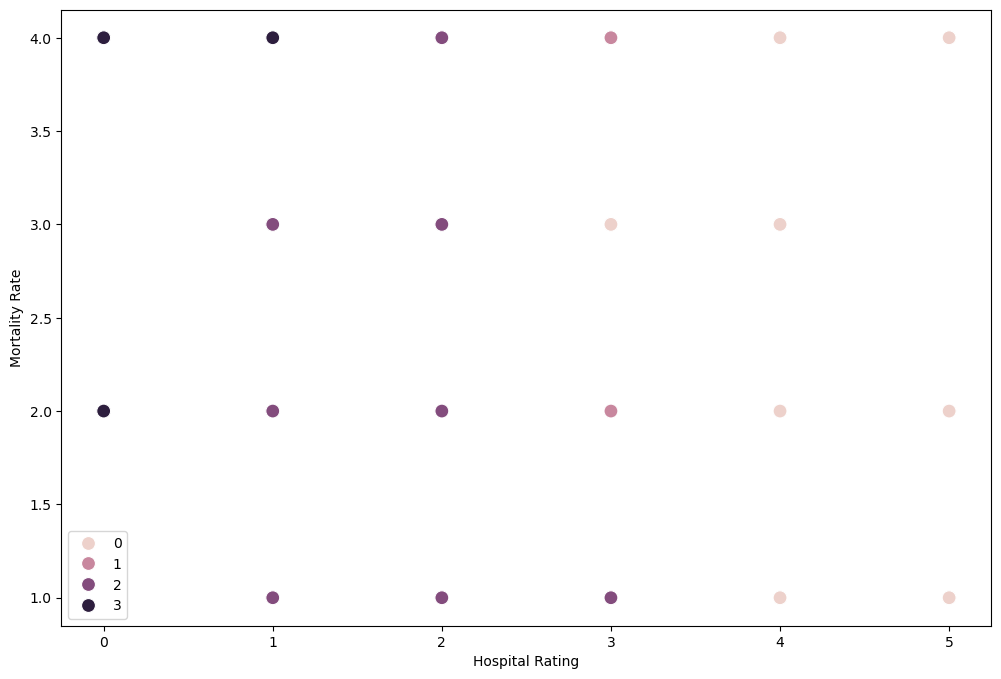

In [144]:
# Plot the clusters for the hospital ratings and mortality rate
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hospital_general_information_subset['hospital_overall_rating'], y=hospital_general_information_subset['mortality_national_comparison'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Hospital Rating') 
plt.ylabel('Mortality Rate')
plt.show()

The clusters are based off the quality of the hospital. The 0 cluster shows the higher hospital ratings or a middle rating in which both contain lower mortality rates. In the 1 cluster, the hospital rating and mortality rate is average. The second cluster illustrates lower to mid hospital ratings with a higher mortality rate. Lastly, in cluster 3, the hospital ratings are low and the mortlaity rate contains some unavaliable data.

## Additional Visualizations

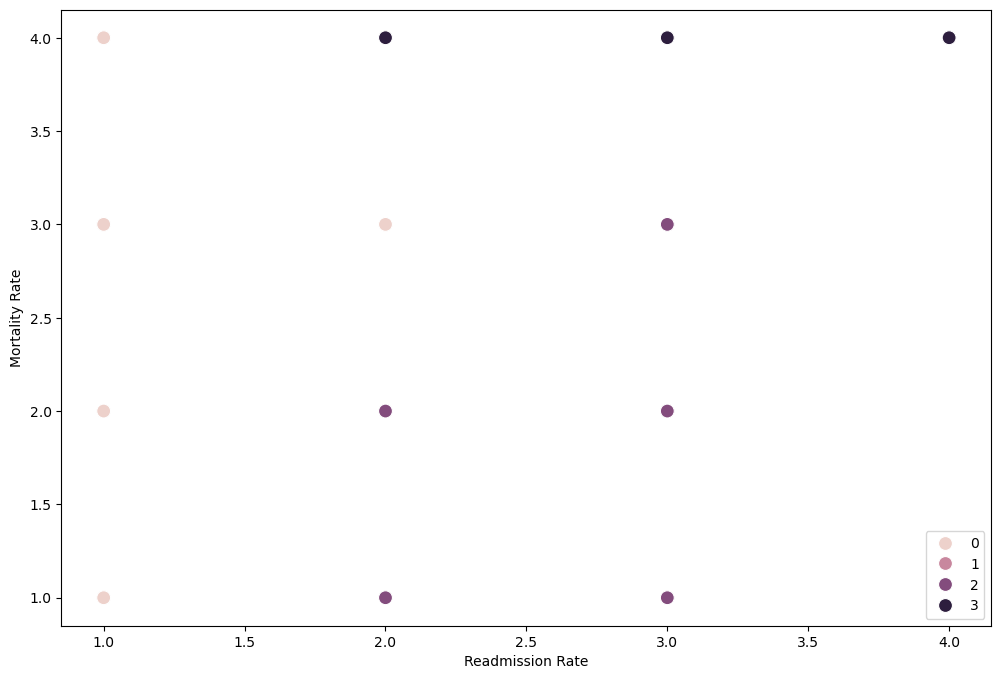

In [160]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hospital_general_information_subset['readmission_national_comparison'], y=hospital_general_information_subset['mortality_national_comparison'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Readmission Rate') 
plt.ylabel('Mortality Rate')
plt.show()

The results of this cluster does not make sense, requiring further analysis. It is an unclear relationship between these variables.

In [164]:
hospital_general_information_subset.loc[hospital_general_information_subset['clusters'] == 3, 'cluster'] = 'dark purple'
hospital_general_information_subset.loc[hospital_general_information_subset['clusters'] == 2, 'cluster'] = 'purple'
hospital_general_information_subset.loc[hospital_general_information_subset['clusters'] == 1, 'cluster'] = 'light purple'
hospital_general_information_subset.loc[hospital_general_information_subset['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\jmiel\AppData\Local\Temp\ipykernel_6356\3821232909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_general_information_subset.loc[hospital_general_information_subset['clusters'] == 3, 'cluster'] = 'dark purple'


In [168]:
hospital_general_information_subset.groupby('cluster').agg({'hospital_overall_rating':['mean', 'median'], 
                         'mortality_national_comparison':['mean', 'median'], 
                         'readmission_national_comparison':['mean', 'median']})

hospital_overall_rating        mortality_national_comparison  \
                                mean median                          mean   
cluster                                                                     
dark purple                 0.014407    0.0                      3.785593   
light purple                3.251526    3.0                      2.296703   
pink                        3.589460    4.0                      2.098243   
purple                      2.351794    2.0                      2.088924   

                    readmission_national_comparison         
             median                            mean median  
cluster                                                     
dark purple     4.0                        3.505932    4.0  
light purple    2.0                        1.930403    2.0  
pink            2.0                        1.810020    2.0  
purple          2.0                        2.496880    3.0

Dark purple indicates information that is not available. The cluster analysis is useful for the overall hospital rating but not as much for the mortality and readmission rate. In general, the mortality rate and readmission rate have similar statistical findings excluding the dark purple under readmissions. 

In future analyses, having a general understanding of the hospital ratings per state or region can be useful in unpacking the quality of care at various hospitals. 